# My AirBnB Analysis




## 1st Task :

#### Find the number of AirBnB listings per city. Show the information in tabular format, and also make a plot.

#### We use 12-month data. We find the airbnb listings per season (from scraping date to scraping date) and calculate the average listings  to account for seasonal fluctuations, regulatory changes, and event-driven variations, providing a more accurate and comprehensive representation of Airbnb listings existence throughout the year. We check some significant changes later.



Import pandas library for files and data handling

In [48]:
import pandas as pd

Pass the cities in a list for the processing

In [49]:
# Load listings data for all cities
# List of cities
cities = [
    'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Copenhagen',
    'Dublin', 'Lisbon', 'London', 'Madrid', 'Paris', 'Rome', 'Venice', 'Vienna'
]

Use the os library, for handling directories and filepaths

In [50]:
import os

# Initialize an empty dictionary to store the data
city_data = {}
# Initialize an empty dictionary to store the inactivity data
city_inactivity = {}    

# Get the current working directory
current_directory = os.getcwd()



Iterate each city's folder, and then all the listings file, in order to take the ids and scraping date for each data scraping.
Create a dict with "cities" as keys, unique ids and scraping date as values. 
The number of values for each key is the number of scrapes per city during the last year. Its generally 4 scrapes, instead of Berlin that is 3.

Also, evaluate the **inactivity** of the listings. Inacitivity is when a listing is not actual active, i.e. not rented at all. Consider that it's not rented when it has not reviews in the last year. Create a dict with "cities" as keys, and the number of inactive listings and scraping dates as values.

Capture the average inactivity also  in the plots.

In [51]:
# Initialize an empty dictionary to store the dataframes for each city, in order to not read the files multiple times
city_dfs = {}
# Loop through each city in the list
for city in cities:
    # Construct the relative path to the folder named after the city
    folder_path = os.path.join(current_directory, city, "listings")
    # Check if the folder exists
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # Initialize empty lists to store information about each file
        city_files_data = []
        city_files_inactivity = []
        # Initialize the list for the city in city_dfs
        city_dfs[city] = []
        # List all CSV files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.gz'):
                # Construct the full file path
                file_path = os.path.join(folder_path, file_name)

                # Read the CSV file using pandas
                try:
                    df = pd.read_csv(file_path)
                    
                    # Count the number of unique IDs in this file
                    num_unique_ids = len(df['id'].unique())
                    # Get the scrape date (assuming it's a single value for the file)
                    scrape_date = df['calendar_last_scraped'].iloc[0]
                    # Append the [number of unique IDs, scrape date] to the city's data list
                    city_files_data.append([num_unique_ids, scrape_date])

                    # Count the number of inactive listings (number of reviews in the last 12 months is 0)
                    inactive_listings = (df['number_of_reviews_ltm'] == 0).sum()
                    # Append the number of inactive listings to the city's inactivity list
                    city_files_inactivity.append(inactive_listings)
                    
                    
                    city_dfs[city].append(df)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

        # Add the city's data to the dictionary
        city_data[city] = city_files_data
        # Calculate the mean of inactive listings for the city
        mean_inactive_listings = sum(city_files_inactivity) / len(city_files_inactivity) if city_files_inactivity else 0
        city_inactivity[city] = mean_inactive_listings
    else:
        print(f"Folder for {city} does not exist or is not a directory.")



#### Based on the results, there are noticeable fluctuations in the number of Airbnb listings across different periods. A prime example is Paris, where the number of listings increased by 20,000 (30%) from December 2023 to June 2024, likely in anticipation of the Olympic Games scheduled for summer 2024. Conversely, a significant decline was observed in Dublin, where listings decreased by approximately 4,300 (about 50%, from December 2023 to 22 March 2024).This makes sense, as the most important holiday for the Irish people is St. Patrick's Day, with thousands of people visiting Dublin on those days.. Therefore, we will use the average number of listings from the previous year's records for each city as a reference point.

*source :*  
https://news.airbnb.com/unprecedented-interest-in-the-paris-region-during-olympic-games-paris-2024/#:~:text=Data%20released%20today%20by%20Airbnb%20shows%20a%20significant,last%20year%20%E2%80%93%20that%E2%80%99s%20an%20astonishing%2010%2C000%25%20increase.  
https://www.hospitalitynet.org/news/4122778.html#:~:text=During%20the%20Olympic%20period%20%28July%2026%2C%202024%20to,by%20nearly%2040%25%20compared%20to%20a%20year%20ago.
https://www.rte.ie/brainstorm/2022/0314/1286255-st-patricks-day-tourism-business/

For checking our position about St. Patrick's Day, we find the date with the greater number of unavailable listings for Dublin.

In [52]:
import os 
import pandas as pd

# Define the path to the calendar.csv file, the data are scraped in 15/12/2024
calendar_file_path = "Dublin/calendar.csv"

# Read the CSV file using pandas
calendar_df = pd.read_csv(calendar_file_path, low_memory=False)

# Group by date and count the number of unique ids with availability = 'f'
date_grouped = calendar_df[calendar_df['available'] == 'f'].groupby('date')['listing_id'].nunique()

# Find the date with the maximum count of unique ids
max_date = date_grouped.idxmax()
max_count = date_grouped.max()

print(f"Date with the maximum count of unique ids with availability = 'f': {max_date}, Count: {max_count}")

Date with the maximum count of unique ids with availability = 'f': 2024-03-16, Count: 7901


The date is 16/03/2024, 1 day before Saint Patrick's Day. Cool!

#### Continue with the procecude

Aggregate the unique ids of each scraping for each city. Then, calculate the average amount of ids, in order to find the average amount of available airbnbs per city during the last year.

In [53]:
average_listings = {}

for city, data in city_data.items():
    if data:
        total_ids = sum(item[0] for item in data)
        average_ids = total_ids / len(data)
        average_listings[city] = average_ids


Create a tabular view of airbnb listings for all the cities

In [54]:

df_average_listings = pd.DataFrame(list(average_listings.items()), columns=['City', 'AirBnB Listings'])
df_average_listings['AirBnB Listings'] = df_average_listings['AirBnB Listings'].round().astype(int)
df_average_listings

,City,AirBnB Listings
0,Amsterdam,9163
1,Athens,13218
2,Barcelona,18812
3,Berlin,13483
4,Copenhagen,19184
5,Dublin,6433
6,Lisbon,23354
7,London,93073
8,Madrid,26368
9,Paris,87518


Visualize the number of listings per city using a bar plot, with x-axis values increasing by 5,000

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

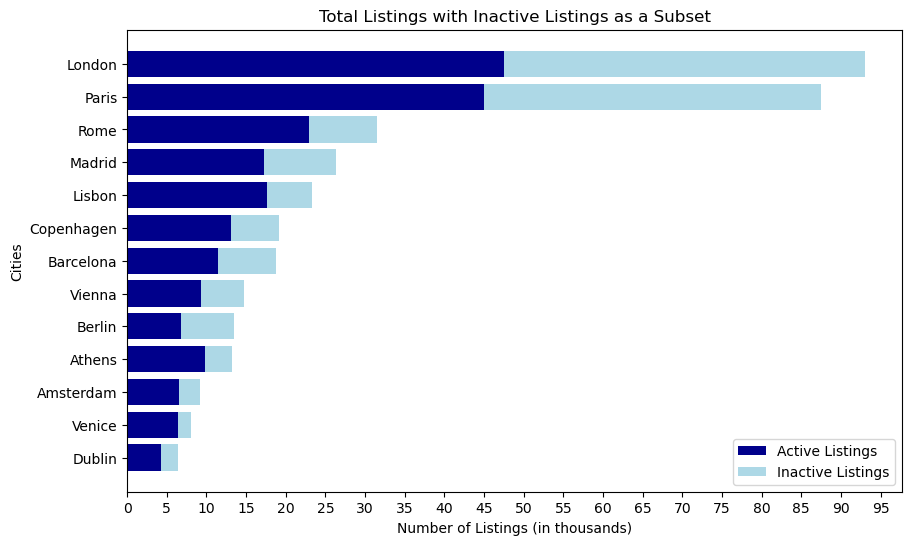

In [56]:

# Sort the cities by total listings in descending order
sorted_cities = sorted(average_listings.keys(), key=lambda x: average_listings[x], reverse=False)
sorted_totals = [average_listings[city]/1000 for city in sorted_cities]
sorted_inactives = [city_inactivity[city]/1000 for city in sorted_cities]
sorted_actives = [total - inactive for total, inactive in zip(sorted_totals, sorted_inactives)]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_cities, sorted_actives, label='Active Listings', color='darkblue')
ax.barh(sorted_cities, sorted_inactives, left=sorted_actives, label='Inactive Listings', color='lightblue')

# Customize the x-axis
max_total = max(sorted_totals)
x_ticks = np.arange(0, max_total + 5, 5)  # Increment by 5
ax.set_xticks(x_ticks)

# Labels and legend
ax.set_ylabel('Cities')
ax.set_xlabel('Number of Listings (in thousands)')
ax.set_title('Total Listings with Inactive Listings as a Subset')
ax.legend()

# Show plot
plt.show()



## 2nd Task :

#### Apart from the number of distinct listings, we are interested in the density, that is the number of AirBnB listings per 1,000 inhabitants, again for the latest 12 months period for which data is available. You must determine the number of inhabitants per city in the most appropriate way. Show the information in tabular format, and also make a plot.

**Main Idea :**

Try to find ways to make the density index as representative as possible for each city. We use the information of "Explore Data", in order to see the limits of the map for each city representation.

For example, in Athens the files provide details for the listings of airbnb in the municipality of Athens, and not in the general area. So we take the population of the municipality. We do the same for the rest cities. Our source is City Population.

*City Population* (https://citypopulation.de/) is a website that provides statistics on the populations of cities and towns globally. It sources its data from:

- National Statistical Offices  
- Local Authorities  
- International Organizations (e.g., UN, World Bank)
- Research Studies


##### We start with :

Create and initialize the Density Index and Population per City. 

In [57]:
Density_Index = {city: 0 for city in cities}
Density_Index_Inactive = {city: 0 for city in cities}   
population = {city: 0 for city in cities}

*Amsterdam*
  
population : 931,298 (with Weesp area that is not included in airbnbs data)  
Weesp : 19,370

source: Statistics Netherlands (2024).
https://www.citypopulation.de/en/netherlands/admin/noord_holland/0363__amsterdam  
https://www.citypopulation.de/en/netherlands/noordholland/_/BK00759__weesp/

In [58]:
population['Amsterdam'] = 931298 - 19370

*Athens* 

population : 643,449

source : General Secretariat of National Statistical Service of Greece (2021).  
https://www.citypopulation.de/en/greece/attiki/4501__d%C3%ADmos_athina%C3%ADon/

In [59]:
population['Athens'] = 643449

*Barcelona* 

population : 1,655,956

source : Instituto Nacional de Estadística, Madrid (2023)  
https://www.citypopulation.de/en/spain/localities/barcelona/08019__barcelona/

In [60]:
population['Barcelona'] = 1655956

*Berlin* 

population :  3,596,999

source : Statistisches Bundesamt Deutschland, Statistical Offices of the German States (2022).  
https://www.citypopulation.de/en/germany/admin/berlin/11000__berlin/

In [61]:
population['Berlin'] = 3596999

*Copenhagen* 

population :  659,350  
The map's limits include Frederiksberg area  
Frederiksberg :  104,899

source :Denmark Statistik (2024).  
https://www.citypopulation.de/en/denmark/hovedstaden/101__k%C3%B8benhavn/  
https://www.citypopulation.de/en/denmark/hovedstaden/147__frederiksberg/

In [62]:
population['Copenhagen'] = 659350 + 104899

*Dublin* 

Dublin, based on the maps, is consisted of 4 areas :  
South Dublin (301,075)  
Dun Laoghaire (26,525)  
Dublin City (592,713)  
Fingal (330,506)

source :Central Statistics Office, Ireland (2022).  
https://www.citypopulation.de/en/ireland/admin/leinster/DC__dublin_city/
https://www.citypopulation.de/en/ireland/towns/FL__fingal/  
https://www.citypopulation.de/en/ireland/towns/SD__south_dublin/  
https://www.geodatos.net/en/cities/dun-laoghaire#:~:text=Population%2026%2C525%20World%20rank%3A,18%2C183%20Rank%20in%20Ireland%3A%2013

In [63]:
population['Dublin'] = 301075 + 26525 + 592713 + 330506 

*Lisbon* 

populaton : 2,275,385

We observe a large variation between the coastal and the rest areas of lisbon, but if we look at the population data there is a similar variation.  




source : Instituto Nacional de Estatística Portugal (2021) 
https://www.citypopulation.de/en/portugal/admin/11__lisboa/


In [64]:
population['Lisbon'] = 2275385

*London* 

populaton : 8,799,728

source : UK National Statistics (2021) 
https://www.citypopulation.de/en/uk/england/admin/E12000007__london/

In [65]:
population['London'] = 8799728

*Madrid* 

populaton : 3,340,176

source : Instituto Nacional de Estadística, Madrid (2023) 
https://www.citypopulation.de/en/spain/cities/?cityid=6678

In [66]:
population['Madrid'] = 3340176

*Paris* 

populaton : 2,133,111


source : Institut National de la Statistique et des Études Économiques, France (2021) 
https://www.citypopulation.de/en/france/cityofparis/

In [67]:
population['Paris'] = 2133111

*Rome* 

populaton : 2,749,031


source : Istituto Nazionale di Statistica Italia (2021) 
https://www.citypopulation.de/en/italy/romacity/


In [68]:
population['Rome'] = 2749031

*Venice* 

populaton : 250,369


source : Istituto Nazionale di Statistica Italia (2024) 
https://www.citypopulation.de/en/italy/cities/veneto/?cityid=3212


In [69]:
population['Venice'] = 250369

*Vienna* 

populaton : 2,005,760


source : Statistik Austria (2024) 
https://www.citypopulation.de/en/austria/cities/?cityid=103

In [70]:
population['Vienna'] = 2005760

We have the adjusted population and the estimation about the average listings per city, and inacvtivity too.  
Calculate the **Dencity Index**, the number of AirBnB total listings per 1,000 inhabitants for each city.  
Also, calculate the **Dencity_Index_Inactive** as the number of AirBnB inactive listings per 1,000 inhabitants for each city.

In [71]:
for city in cities:
    
    Density_Index[city] = round(((average_listings[city] / population[city]) * 1000), 1)
    Density_Index_Inactive[city] = round((city_inactivity[city] / population[city]) * 1000, 1)


Show the information in tabular format

In [72]:
df_density = pd.DataFrame({
    'City': list(Density_Index.keys()),
    'Total Listings per 1000 inhabitants': list(Density_Index.values()),
    'Inactive Listings per 1000 inhabitants': [Density_Index_Inactive[city] for city in Density_Index.keys()]
})
df_density


,City,Total Listings per 1000 inhabitants,Inactive Listings per 1000 inhabitants
0,Amsterdam,10.0,2.9
1,Athens,20.5,5.2
2,Barcelona,11.4,4.5
3,Berlin,3.7,1.9
4,Copenhagen,25.1,8.0
5,Dublin,5.1,1.7
6,Lisbon,10.3,2.5
7,London,10.6,5.2
8,Madrid,7.9,2.7
9,Paris,41.0,19.9


Make a plot.

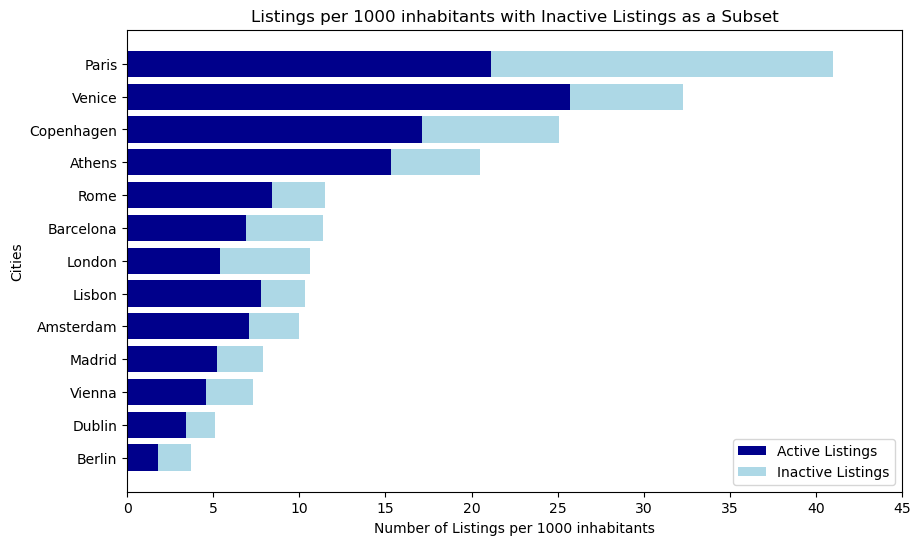

In [73]:

# Sort the cities by total listings in descending order
sorted_cities = sorted(Density_Index.keys(), key=lambda x: Density_Index[x], reverse=False)
sorted_totals_Index = [Density_Index[city] for city in sorted_cities]
sorted_inactivity_Index = [Density_Index_Inactive[city] for city in sorted_cities]
sorted_activity_Index = [total - inactive for total, inactive in zip(sorted_totals_Index, sorted_inactivity_Index)]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_cities, sorted_activity_Index, label='Active Listings', color='darkblue')
ax.barh(sorted_cities, sorted_inactivity_Index, left=sorted_activity_Index, label='Inactive Listings', color='lightblue')

# Customize the x-axis
max_total = max(sorted_totals_Index)
x_ticks = np.arange(0, max_total + 5, 5)  # Increment by 5
ax.set_xticks(x_ticks)

# Labels and legend
ax.set_ylabel('Cities')
ax.set_xlabel('Number of Listings per 1000 inhabitants')
ax.set_title('Listings per 1000 inhabitants with Inactive Listings as a Subset')
ax.legend()

# Show plot
plt.show()


## 3rd Task :

### We are interested in the AirBnB bookings and income per listing for each city. Calculate, for each city, the average number of nights a listing is booked, by assuming that half of the bookings have reviews, and that each booking is for three nights. Use the number of reviews for the last 12 months for each listing. To calculate the income per listing, multiply the price of each listing by the number of bookings you have calculated for the listing. Then, find the average of the income per listing for each city.

**Main Idea :**  

We use a different approach to this question. Since we are calculating the average number of bookings and income per listing, we need to set a common time period of existence on the platform for all the listings we will use (different metrics yield listings that exist on the platform for 2, 6, or 12 months). For this reason we only take into account the listings that exist during the entire time on the platform (they exist on all scrapes) 


Regarding the prices of listings, for reasons mentioned earlier (e.g seasonal fluctuations, event-driven variations), we take as a measure the average of the listing's prices in all scrapes.

Remove the listings that have null values for all prices.

Remove the inactive listings (inactive listing: 0 reviews last 12 months)

Create the "bookings" (2 * reviews). Each booking is for 3 days, so the maximum bookings for the last 12 months is 121 (3*121 = 363 days)

The maximum price in Amsterdam is 9999, Athens is 60543, Rome is 74000, Vienna is 5683  

That's too big numbers. From my browsing on the site I could not find prices like these. At the same time, my sources show me that the maximum price in Europe is 21,500 euros per night, specifically in Upper Engadine, Switzerland. So, that's a sign that we should definetely cut the outliers. We checked many values, until we conclude to a = 0.001 (0.1%)

*source :* https://www.bluewin.ch/en/entertainment/europes-most-expensive-airbnb-is-in-switzerland-2360668.html#:~:text=The%20most%20expensive%20Airbnb%20offer%20in%20Europe%20is,a%20butler%20and%20access%20to%20the%20ski%20slopes.  

*Bluewin is a Swiss news site owned by Swisscom, a major telecommunications company. It covers a variety of topics, including current affairs, culture, and entertainment.*





In [74]:
cities = [
    'Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Copenhagen',
    'Dublin', 'Lisbon', 'London', 'Madrid', 'Paris', 'Rome', 'Venice', 'Vienna'
]

In [75]:
from functools import reduce

# Initialize an empty dictionary to store the data
income_data = {}
# Initialize an empty dictionary to store the average listing income
average_listing_income = {}
for city in cities:
    # Load only the necessary columns from each CSV file
    df0 = city_dfs[city][0][['id', 'number_of_reviews_ltm']]
    df1 = city_dfs[city][0][['id', 'price']]
    df2 = city_dfs[city][1][['id', 'price']]
    df3 = city_dfs[city][2][['id', 'price']]
    if city != 'Berlin':
        df4 = city_dfs[city][3][['id', 'price']]

    # List of all DataFrames
    if city != 'Berlin':

        dfs = [df1, df2, df3, df4]
    else:
        dfs = [df1, df2, df3]

    # Function to merge DataFrames with unique suffixes for 'price' columns
    def merge_with_suffixes(dfs):
        merged_df = dfs[0]
        for i, df in enumerate(dfs[1:], start=2):
            merged_df = pd.merge(merged_df, df, on='id', suffixes=(f'', f'_file{i}'))
        return merged_df

    # Merge all DataFrames
    merged_df = merge_with_suffixes(dfs)

    # Remove rows where all columns are null
    merged_df = merged_df.dropna(how='all', subset=merged_df.columns.difference(['id']))
    # Calculate the average price for each listing
    price_columns = [col for col in merged_df.columns if 'price' in col]
    merged_df['average_price'] = merged_df[price_columns].replace('[\\$,]', '', regex=True).astype(float).mean(axis=1)
    # Drop all columns except 'average_price'
    merged_df = merged_df[['id', 'average_price']]
    # Display the number of reviews the last 12 months
    merged_df = pd.merge(df0, merged_df, on='id')
    # Remove listings with 0 reviews
    merged_df = merged_df[merged_df['number_of_reviews_ltm'] > 0]


    # Remove outliers for the prices (5th to 95th percentile)
    lower_bound = merged_df['average_price'].quantile(0.001)
    upper_bound = merged_df['average_price'].quantile(0.999)
    merged_df = merged_df[(merged_df['average_price'] >= lower_bound) & (merged_df['average_price'] <= upper_bound)]


    # Calculate the number of bookings by multiplying the number of reviews by 2
    merged_df['bookings'] = merged_df['number_of_reviews_ltm'] * 2
    # Cap the number of bookings at 120
    merged_df['bookings'] = merged_df['bookings'].apply(lambda x: min(x, 121))
    # Calculate the annual income for each listing
    merged_df['annual_income'] = merged_df['bookings'] * 3 * merged_df['average_price']

    # Add the city's data to the dictionary
    income_data[city] = merged_df

    # Calculate the average listing income for the city
    average_listing_income[city] = merged_df['annual_income'].mean()

    

Finally, change from local currencies to euros, and print the output.  
Copenhagen 1 DKK = 0.13 EUR  
London 1 GBP = 1.20 EUR


In [76]:
# Change the currency for the cities that dont use EUR
average_listing_income['Copenhagen'] = average_listing_income['Copenhagen'] * 0.13
average_listing_income['London'] = average_listing_income['London'] * 1.20
# Round the average listing income to 2 decimal places
average_listing_income = {city: round(income,1) for city, income in average_listing_income.items()}

In [77]:

# Create a DataFrame from the average listing income dictionary
df_average_income = pd.DataFrame(list(average_listing_income.items()), columns=['City', 'Average Listing Income (EUR)'])
df_average_income

   

,City,Average Listing Income (EUR)
0,Amsterdam,16284.8
1,Athens,11237.1
2,Barcelona,22279.0
3,Berlin,14471.0
4,Copenhagen,7516.2
5,Dublin,21164.6
6,Lisbon,15487.9
7,London,13343.7
8,Madrid,17081.0
9,Paris,13912.2


## Task 4 :


#### Find the total number of bookings and nights spent over the last 12 months period for which you have data, for each of the cities. Then compare your findings with publicly available data. Explain how you sourced the data, the methodology that has been used for their collection, and your assessment of their quality. Discuss any differences from your own results.

We search through all the listings files to find all the ids that existed during the last 12 months. Then we match the ids with the ids in the correspondent reviews files, to get the number of reviews for all these listings, with the accepted date of creation of the reviews fixed (12 months before the last scrape).

In fact, going backwards, we find crossed out ids and their corresponding reviews. We add them all together in a table for each city

In [78]:
# dates 12 months back for each city 
dates_ltm = {}
dates_ltm['Amsterdam'] = '2023-09-05'
dates_ltm['Athens'] = '2023-06-26'  
dates_ltm['Barcelona'] = '2023-09-06'
dates_ltm['Berlin'] = '2023-06-23'
dates_ltm['Copenhagen'] = '2023-06-30'
dates_ltm['Dublin'] = '2023-09-11'
dates_ltm['Lisbon'] = '2023-09-14'
dates_ltm['London'] = '2023-09-06'
dates_ltm['Madrid'] = '2023-09-11'
dates_ltm['Paris'] = '2023-09-11'
dates_ltm['Rome'] = '2023-09-11'
dates_ltm['Venice'] = '2023-09-05'
dates_ltm['Vienna'] = '2023-09-11'


In [79]:
city_reviews = {}
city_bookings_nights = {}
for city in cities:
    city_reviews[city] = city_dfs[city][0][['id', 'number_of_reviews_ltm']]
    city_reviews[city] = city_reviews[city].rename(columns={'id': 'listing_id'})

    # Load the last scraped reviews data for each city
    df_reviews = pd.read_csv(f'{city}/reviews/reviews.csv')
    # Filter the reviews data for the last 12 months
    df_reviews = df_reviews[df_reviews['date'] >= dates_ltm[city]]
    # Group by listing_id and count the number of reviews
    df_reviews = df_reviews.groupby('listing_id').size().reset_index(name='number_of_reviews_ltm')
    # Keep the reviews id that dont exist in the existing reviews data
    df_reviews = df_reviews.loc[~df_reviews['listing_id'].isin(city_reviews['Amsterdam']['listing_id'])]
    # Concatenate the new reviews data with the existing reviews data
    city_reviews[city] = pd.concat([df_reviews, city_reviews[city]])

    # Repeat the process with the other reviews files
    df_reviews2 = pd.read_csv(f'{city}/reviews/reviews2.csv')
    df_reviews2 = df_reviews2[df_reviews2['date'] >= dates_ltm[city]]
    df_reviews2 = df_reviews2.groupby('listing_id').size().reset_index(name='number_of_reviews_ltm')
    df_reviews2 = df_reviews2.loc[~df_reviews2['listing_id'].isin(city_reviews[city]['listing_id'])]
    city_reviews[city] = pd.concat([df_reviews2, city_reviews[city]])

    df_reviews3 = pd.read_csv(f'{city}/reviews/reviews3.csv')
    df_reviews3 = df_reviews3[df_reviews3['date'] >= dates_ltm[city]]
    df_reviews3 = df_reviews3.groupby('listing_id').size().reset_index(name='number_of_reviews_ltm')
    df_reviews3 = df_reviews3.loc[~df_reviews3['listing_id'].isin(city_reviews[city]['listing_id'])]
    city_reviews[city] = pd.concat([df_reviews3, city_reviews[city]])
    if city != 'Berlin':
        df_reviews4 = pd.read_csv(f'{city}/reviews/reviews4.csv')
        df_reviews4 = df_reviews4[df_reviews4['date'] >= dates_ltm[city]]
        df_reviews4 = df_reviews4.groupby('listing_id').size().reset_index(name='number_of_reviews_ltm')
        df_reviews4 = df_reviews4.loc[~df_reviews4['listing_id'].isin(city_reviews[city]['listing_id'])]
        city_reviews[city] = pd.concat([df_reviews4, city_reviews[city]])
    # Create a new column "bookings" where its the number of reviews * 2
    city_reviews[city]['bookings'] = city_reviews[city]['number_of_reviews_ltm'] * 2
    # Cap the number of bookings at 121 (3*121 = 363 days)
    city_reviews[city]['bookings'] = city_reviews[city]['bookings'].apply(lambda x: min(x, 121))
    # Create a new column "nights" where it's the number of bookings * 3
    city_reviews[city]['nights'] = city_reviews[city]['bookings'] * 3

    # Add the city's bookings and nights to the dictionary
    city_bookings_nights[city] = {'bookings' : city_reviews[city]['bookings'].sum(), 'nights' : city_reviews[city]['nights'].sum()}
    # Create a DataFrame from the city_bookings_nights dictionary
    df_city_bookings_nights = pd.DataFrame.from_dict(city_bookings_nights, orient='index').reset_index()
    df_city_bookings_nights.columns = ['City', 'Total Bookings', 'Total Nights']



In [80]:
df_city_bookings_nights

,City,Total Bookings,Total Nights
0,Amsterdam,168717,506151
1,Athens,755329,2265987
2,Barcelona,902051,2706153
3,Berlin,474316,1422948
4,Copenhagen,431702,1295106
5,Dublin,338034,1014102
6,Lisbon,1410059,4230177
7,London,2340152,7020456
8,Madrid,1519453,4558359
9,Paris,2209619,6628857


The source from which we will get the data to compare with ours is **AirDNA**.  
AirDNA is a platform that provides data and analytics for the short-term rental market, mainly Airbnb.  
The way I calculated bookings and nights is the following :  
- Occupancy Rate * Active Listings * 365 = Nights  
- Nights / 3 = Bookings 

In [81]:
Occupancy_Rate = {}
Occupancy_Rate['Amsterdam'] = 0.71
Occupancy_Rate['Athens'] = 0.65
Occupancy_Rate['Barcelona'] = 0.75
Occupancy_Rate['Berlin'] = 0.71
Occupancy_Rate['Copenhagen'] = 0.69
Occupancy_Rate['Dublin'] = 0.62
Occupancy_Rate['Lisbon'] = 0.76
Occupancy_Rate['London'] = 0.62
Occupancy_Rate['Madrid'] = 0.71
Occupancy_Rate['Paris'] = 0.63
Occupancy_Rate['Rome'] = 0.73
Occupancy_Rate['Venice'] = 0.69
Occupancy_Rate['Vienna'] = 0.66



AirDNA_listings = {}
AirDNA_listings['Amsterdam'] = 5029
AirDNA_listings['Athens'] = 12824
AirDNA_listings['Barcelona'] = 12050
AirDNA_listings['Berlin'] = 7188
AirDNA_listings['Copenhagen'] = 10116
AirDNA_listings['Dublin'] = 3845
AirDNA_listings['Lisbon'] = 14228
AirDNA_listings['London'] = 55289
AirDNA_listings['Madrid'] = 19779
AirDNA_listings['Paris'] = 44988
AirDNA_listings['Rome'] = 29518
AirDNA_listings['Venice'] = 8419
AirDNA_listings['Vienna'] = 10259
 
AirDNA_bookings = {}
AirDNA_nights = {}
for city in cities:
    AirDNA_nights[city] = AirDNA_listings[city] * Occupancy_Rate[city] * 363
    AirDNA_bookings[city] = AirDNA_nights[city] / 3

print(AirDNA_nights)
print(AirDNA_bookings)

# Add AirDNA Total Bookings and AirDNA Total Nights to the DataFrame
df_city_bookings_nights['AirDNA Total Bookings'] = df_city_bookings_nights['City'].apply(lambda x: AirDNA_bookings[x])
df_city_bookings_nights['AirDNA Total Nights'] = df_city_bookings_nights['City'].apply(lambda x: AirDNA_nights[x])

# Calculate the differences between our data and AirDNA data
df_city_bookings_nights['Difference in Bookings'] = df_city_bookings_nights['Total Bookings'] - df_city_bookings_nights['AirDNA Total Bookings']
df_city_bookings_nights['Difference in Nights'] = df_city_bookings_nights['Total Nights'] - df_city_bookings_nights['AirDNA Total Nights']

# Display the updated DataFrame
df_city_bookings_nights



{'Amsterdam': 1296124.17, 'Athens': 3025822.8000000003, 'Barcelona': 3280612.5, 'Berlin': 1852563.2399999998, 'Copenhagen': 2533754.5199999996, 'Dublin': 865355.7000000001, 'Lisbon': 3925220.64, 'London': 12443342.34, 'Madrid': 5097641.67, 'Paris': 10288305.719999999, 'Rome': 7821974.819999999, 'Venice': 2108706.9299999997, 'Vienna': 2457851.22}
{'Amsterdam': 432041.38999999996, 'Athens': 1008607.6000000001, 'Barcelona': 1093537.5, 'Berlin': 617521.08, 'Copenhagen': 844584.8399999999, 'Dublin': 288451.9, 'Lisbon': 1308406.8800000001, 'London': 4147780.78, 'Madrid': 1699213.89, 'Paris': 3429435.2399999998, 'Rome': 2607324.94, 'Venice': 702902.3099999999, 'Vienna': 819283.7400000001}


,City,Total Bookings,Total Nights,AirDNA Total Bookings,AirDNA Total Nights,Difference in Bookings,Difference in Nights
0,Amsterdam,168717,506151,432041.39,1296124.17,-263324.39,-789973.17
1,Athens,755329,2265987,1008607.60,3025822.80,-253278.60,-759835.80
2,Barcelona,902051,2706153,1093537.50,3280612.50,-191486.50,-574459.50
3,Berlin,474316,1422948,617521.08,1852563.24,-143205.08,-429615.24
4,Copenhagen,431702,1295106,844584.84,2533754.52,-412882.84,-1238648.52
5,Dublin,338034,1014102,288451.90,865355.70,49582.10,148746.30
6,Lisbon,1410059,4230177,1308406.88,3925220.64,101652.12,304956.36
7,London,2340152,7020456,4147780.78,12443342.34,-1807628.78,-5422886.34
8,Madrid,1519453,4558359,1699213.89,5097641.67,-179760.89,-539282.67
9,Paris,2209619,6628857,3429435.24,10288305.72,-1219816.24,-3659448.72


AirDNA calculates occupancy rates by dividing the number of nights a property was booked by the total available nights for the same period. The occupancy rate is expressed as a percentage, representing how often a property is rented out compared to its availability. 


Its a good measure for checking the annual bookings and nights for each city. Let's see where are the differencies from our approach.

Take the Actives Listings we found in **Task 1**

In [82]:
actives_dict = {}
for city in cities:
    actives_dict[city] = average_listings[city] - city_inactivity[city]

In [83]:
# Create a DataFrame with the active listings from my analysis and AirDNA
df_active_listings_comparison = pd.DataFrame({
    'City': cities,
    'My analysis Active Listings': [int(actives_dict[city]) for city in cities],
    'AirDNA Active Listings': [AirDNA_listings[city] for city in cities]
})
# Calculate the difference in active listings
df_active_listings_comparison['Difference in Active Listings'] = df_active_listings_comparison['My analysis Active Listings'] - df_active_listings_comparison['AirDNA Active Listings']
# Display the DataFrame
df_active_listings_comparison

,City,My analysis Active Listings,AirDNA Active Listings,Difference in Active Listings
0,Amsterdam,6497,5029,1468
1,Athens,9864,12824,-2960
2,Barcelona,11438,12050,-612
3,Berlin,6772,7188,-416
4,Copenhagen,13100,10116,2984
5,Dublin,4311,3845,466
6,Lisbon,17648,14228,3420
7,London,47500,55289,-7789
8,Madrid,17291,19779,-2488
9,Paris,45003,44988,15


It is obvious that changes in active lists are negligible to affect the difference in nights and bookings.   
From this we conclude that the difference is due to the occupancy rate.  
Obviously, either the way AirDNA calculates this indicator is exaggerated, or the way we calculate bookings (1 bookinig = 2 reviews) is quite conservative.

## Task 5 :

#### Check the visualisations at the right of <https://insideairbnb.com/athens/>. Replicate these visualisations. Make the selection interactive, i.e., the user should be able to select a city from a dropdown box and see the corresponding visualisations. You can use any visualisation library. A good visualisation library that we did not have time to explore in the lectures but is worth your attention and comes with interactive features is [Vega-Altair]( https://altair-viz.github.io/user_guide/interactions.html).

#### We will use Vega-Altair and for the visualizations. At this point we need to mention some things :
1) The data used for the charts is the data used for "Task 3 : Activity". 
2) Without knowing it during my analysis I defined the concept of "inactivity" and removed some listings , I did something very similar to Inside AirBnB which defines "Only recent and frequently booked", so since my data already includes "inactivity" it makes no sense to create a corresponding button (like the "Only recent and frequently booked" button )


In [84]:

city_visualization = {}
for city in cities :
    df = city_dfs[city][0][['id', 'host_id', 'host_name', 'host_total_listings_count', 'room_type','minimum_nights', 'license']]
    city_visualization[city] = pd.merge(income_data[city], df, on='id')
    city_visualization[city]['city'] = city
    


Concatenate all dfs to work with Altair

In [85]:
# Concatenate all dataframes in city_visualization into one big dataframe
cities_together_data = pd.concat(city_visualization.values(), ignore_index=True)

Create the "Number of room types per City" interactive visualization

In [86]:
import altair as alt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

alt.data_transformers.disable_max_rows()
# Group by 'city' and 'room_type', counting the occurrences of each room type per city
room_type_counts = cities_together_data.groupby(['city', 'room_type']).size().reset_index(name='count')


# Create a dropdown for city selection with customized appearance
city_dropdown = alt.binding_select(
    options=cities, 
    name="Select City  :  ",
    labels=cities
)
city_select = alt.selection_point(fields=['city'], bind=city_dropdown, value='Amsterdam', empty=False)  # Set default to 'Amsterdam'

# Scatter plot with interactive city filter
chart = alt.Chart(room_type_counts).mark_bar(size=80).encode(
    x='count:Q',
    y='room_type:N',
     color=alt.Color('room_type:N', scale=alt.Scale(
        domain=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], 
        range=['#FF5733', '#33FF57', '#3357FF', '#FFD700'])),  # Custom colors
        text='count:Q'  # Show count value on each bar
).add_params(
    city_select
).transform_filter(
    city_select
).properties(
    width=600,
    height=400,
    title="Number of Room Types by City",
).configure_title(
    fontSize=20  # Adjusts the chart title font size
).configure_axis(
    labelFontSize=16 ,
    titleFontSize=18  # Larger title font size for the axes # Adjust this value for bigger/smaller text
).encode(
    text=alt.Text('percentage:Q', format='.1f')  # Show percentage with one decimal place
)


chart

alt.Chart(...)

Create the "Number of Listings booked in different period per City" interactive visualization

In [87]:
# Create a dropdown for city selection with customized appearance
city_dropdown = alt.binding_select(
    options=cities, 
    name="Select City  :    ",
    labels=cities
)
city_select = alt.selection_point(fields=['city'], bind=city_dropdown, value='Amsterdam', empty=False)  # Set default to 'Amsterdam'


# Create a new column for 'days_booked'
cities_together_data['days_booked'] = cities_together_data['bookings'] * 3

# Bin the 'days_booked' into 30-day periods and cap values over 245 as '246+'
bins = [i for i in range(1, 246, 30)]
labels = ['{}-{}'.format(i, i + 29) for i in bins[:-1]]
cities_together_data['booking_period'] = pd.cut(cities_together_data['days_booked'], bins=bins, labels=labels, right=False)

# Assign '246+' to days booked over 245
cities_together_data['booking_period'] = cities_together_data['booking_period'].cat.add_categories('246+')
cities_together_data.loc[cities_together_data['days_booked'] > 245, 'booking_period'] = '246+'

# Group by city and booking_period to count the number of listings in each period
cities_together_data_grouped = cities_together_data.groupby(['city', 'booking_period']).size().reset_index(name='listing_count')

# Create the dropdown for city selection
city_dropdown = alt.binding_select(
    options=cities, 
    name="Select City"
)
city_select = alt.selection_point(fields=['city'], bind=city_dropdown, name="City")

# Create the bar chart
booking_chart = alt.Chart(cities_together_data_grouped).mark_bar(size=80).encode(
    x=alt.X('booking_period:N', title="Days Booked", sort=labels),  # Ensure sorting
    y=alt.Y('listing_count:Q', title="Number of Listings Booked"),
    color='booking_period:N',
).add_params(
    city_select
).transform_filter(
    city_select
).properties(
    width=800,
    height=400,
    title=f"Number of Listings Booked in Different Periods by City"
).configure_title(
    fontSize=20
).configure_axis(
    labelFontSize=16,
    titleFontSize=18
)

booking_chart

alt.Chart(...)

Create the "License Distribution per City" interactive visualization

In [88]:
# Create a dropdown for city selection with customized appearance
city_dropdown = alt.binding_select(
    options=cities, 
    name="Select City  :    ",
    labels=cities
)
city_select = alt.selection_point(fields=['city'], bind=city_dropdown, value='Amsterdam', empty=False)  # Set default to 'Amsterdam'

# Categorize license types
cities_together_data['license_category'] = cities_together_data['license'].apply(
    lambda x: 'exempt' if x == 'Exempt' else
              'pending' if x == 'pending' else
              'licensed' if isinstance(x, str) else
              'unlicensed' 
)

# Now group by city and license category
license_counts = cities_together_data.groupby(['city', 'license_category']).size().reset_index(name='count')


# Define a fixed color scale with the colors you want
color_scale = alt.Scale(
    domain=['licensed', 'exempt', 'unlicensed', 'pending'],
    range=['#1f77b4', '#ff7f0e', '#aec7e8', '#ffbb78']  # Blue, orange, light blue, light orange
)
# Create the pie chart for license distribution
license_chart = alt.Chart(license_counts).mark_arc().encode(
    theta='count:Q',  # Size of each segment
    color=alt.Color('license_category:N', scale=color_scale),  # Apply the fixed color scale
    tooltip=['license_category:N', 'count:Q']  # Show license category and count on hover
).add_params(
    city_select
).transform_filter(
    city_select
).properties(
    width=400,
    height=400,
    title="License Distribution by City"
)

license_chart

alt.Chart(...)

Create the "Distribution of Listings by Minimum Nights per City" interactive visualization

In [89]:
# Create a dropdown for city selection with customized appearance
city_dropdown = alt.binding_select(
    options=cities, 
    name="Select City  :    ",
    labels=cities
)
city_select = alt.selection_point(fields=['city'], bind=city_dropdown, value='Amsterdam', empty=False)  # Set default to 'Amsterdam'

# Group by city and minimum_nights, then count the occurrences of each value
minimum_nights_counts = cities_together_data.groupby(['city', 'minimum_nights']).size().reset_index(name='listing_count')

# Create the bar chart for minimum nights distribution
minimum_nights_chart = alt.Chart(minimum_nights_counts).mark_bar().encode(
    x='minimum_nights:O',  # Ordinal encoding for minimum nights
    y='listing_count:Q',  # Count of listings
    color='minimum_nights:N',  # Color by minimum nights
    tooltip=['minimum_nights:N', 'listing_count:Q']  # Show minimum nights and count on hover
).add_params(
    city_select
).transform_filter(
    city_select
)

# Add vertical line at 30
line_at_31 = alt.Chart(pd.DataFrame({'x': [31]})).mark_rule(color='black').encode(
    x='x:O'
)

# Combine the bar chart and the vertical line
final_chart = minimum_nights_chart + line_at_31

final_chart.properties(
    width=600,
    height=400,
    title="Distribution of Listings by Minimum Nights per City"
)

alt.LayerChart(...)

Create the "Distribution of Listings per Host per City" interactive visualization

In [90]:
# Create a dropdown for city selection with customized appearance
city_dropdown = alt.binding_select(
    options=cities, 
    name="Select City  :    ",
    labels=cities
)
city_select = alt.selection_point(fields=['city'], bind=city_dropdown, value='Amsterdam', empty=False)  # Set default to 'Amsterdam'

# Group by 'host_total_listings_count' and filter by city selection
listings_per_host_counts = (
    cities_together_data.groupby(['city', 'host_total_listings_count'])
    .size()
    .reset_index(name='count')
)

# Binning: Consolidate host counts with more than 10 listings into '10+'
listings_per_host_counts['host_total_listings_count'] = listings_per_host_counts['host_total_listings_count'].apply(
    lambda x: '10+' if x > 9 else str(x)
)

# Re-group after binning
listings_per_host_counts = (
    listings_per_host_counts.groupby(['city', 'host_total_listings_count'])['count']
    .sum()
    .reset_index()
)


# Define the sort order for the x-axis
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']

# Create the bar chart with city filter
listings_per_host_chart = alt.Chart(listings_per_host_counts).mark_bar(size=40).encode(
    x=alt.X('host_total_listings_count:O', title="Listings per Host", sort=order),
    y=alt.Y('count:Q', title="Listings"),
    tooltip=['host_total_listings_count', 'count']
).add_params(
    city_select
).transform_filter(
    city_select
).properties(
    width=600,
    height=400,
    title="Distribution of Listings per Host per City"
).configure_title(
    fontSize=18,
    anchor='start'
).configure_axisX(
    labelFontSize=12,
    titleFontSize=14,
    labelAngle=0  # Ensures x-axis labels are displayed without decimals
)

listings_per_host_chart

alt.Chart(...)